In [ ]:
1.	Beskriv kort hur en relationsdatabas fungerar.
    En relationsdatabas fungerar genom att information är organiserad i tabeller som består av kolumner vilket kallas för normalisering. Varje rad innehåller en unik nyckel som kopplar ihop tabeller för att upprätta en relation. Denna nyckeln används när en relationsdatabas efterfrågas genom att hitta relaterad data mellan datamängder. 
	 
2. Vad menas med “CRUD”-flödet?
    CRUD står för Create, Read, Uodate och Delete. De är de grundläggande operationerna som användas på data I en databas. Create: lägger till rader i en tabell. Read: läser ut data från en tabell. Update: uppdaterar existerande data I en tabell. Delete: tar bort rader från en tabell.

3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?
    Inner join returnerar poster som har likadana värden i båda tabellerna.
    Left join returnerar alla poster från den vänstra tabellen och de matchande posterna från den högra tabellen .
 
4. Beskriv kort vad indexering i SQL innebär.
    Indexering inom SQL är en datastruktur som lagras i databasen och fungerar ungefär som ett register i en bok där man snabbt kan slå upp det man söker efter. 

5. Beskriv kort vad en vy i SQL är.
    En vy är en sparad fråga eller virtuellt fönster som man kan använda som en tabell. Vyn lagrar ingen data, istället hämtar den data från de underliggande tabellerna varje gång man använder den. 
	
6. Beskriv kort vad en lagrad procedur i SQL är.
    En lagrad procedur är en sparad uppsättning SQL-kod som kan köras flera gånger och kan innehålla frågor, logik och kommandon. Det fungerar som ett program/ funktion som lagras I databasen och körs när man anropar den. 




In [73]:
! pip install sqlalchemy
! pip install pyodbc
! pip install pandas



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
! pip install scipy


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from sqlalchemy import create_engine, URL, inspect
import pandas as pd
import pyodbc
import numpy as np

In [76]:
SERVER = 'localhost' # localhost innebär att du ansluter till en server på din egen dator
DATABASE = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no'

connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

engine = create_engine(connection_url)  # engine är anslutningsobjektet vi använder för att kommunicera med databasen.


In [77]:
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [78]:
connection = engine.connect()

In [79]:
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


In [80]:
# Kontrollerar att man kan ansluta genom att hämta de 10 första raderna i Sales.Store
query = "SELECT TOP 10 * FROM Sales.Store"
df = pd.read_sql(query, connection)

# Printa de 10 första raderna
print(df.head(10))


   BusinessEntityID                            Name  SalesPersonID  \
0               292            Next-Door Bike Store            279   
1               294  Professional Sales and Service            276   
2               296                  Riders Company            277   
3               298              The Bike Mechanics            275   
4               300               Nationwide Supply            286   
5               302           Area Bike Accessories            281   
6               304    Bicycle Accessories and Kits            283   
7               306           Clamps & Brackets Co.            275   
8               308      Valley Bicycle Specialists            277   
9               310               New Bikes Company            279   

                                        Demographics  \
0  <StoreSurvey xmlns="http://schemas.microsoft.c...   
1  <StoreSurvey xmlns="http://schemas.microsoft.c...   
2  <StoreSurvey xmlns="http://schemas.microsoft.c...   
3  <S

In [81]:
# Hämta data för total försäljning per år
query = """
SELECT YEAR(OrderDate) AS Year, COUNT(*) AS TotalOrders, SUM(TotalDue) AS TotalSales
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate)
ORDER BY Year;
"""

df_sales = pd.read_sql(query, connection)

# Visa resultatet på antalet beställningar och summan för de totala försäljningarna för de 4 unika åren 
print(df_sales.head(4))


   Year  TotalOrders    TotalSales
0  2011         1607  1.415570e+07
1  2012         3915  3.767570e+07
2  2013        14182  4.896589e+07
3  2014        11761  2.241950e+07


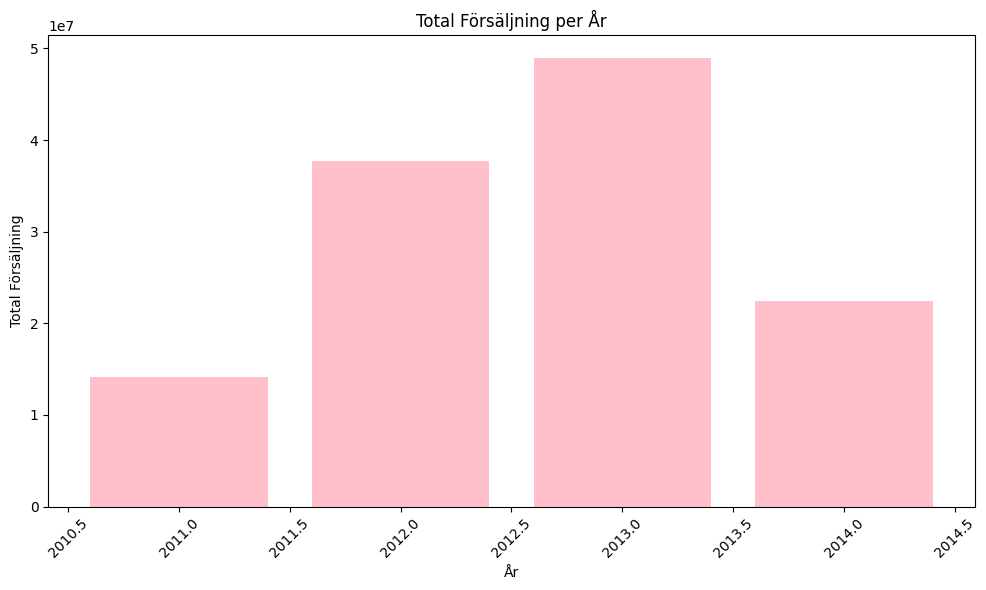

In [82]:
import matplotlib.pyplot as plt  # Vi importerar biblioteket för att skapa diagram

# Skapa ett stapeldiagram för total försäljning per år
plt.figure(figsize=(10,6))  # Bestämmer storleken på diagrammet
plt.bar(df_sales['Year'], df_sales['TotalSales'], color='pink')  # Skapar staplarna för varje år
plt.title('Total Försäljning per År')  # Titeln på diagrammet
plt.xlabel('År')  # Etikett för X-axeln
plt.ylabel('Total Försäljning')  # Etikett för Y-axeln
plt.xticks(rotation=45)  # Luta x-axelns etiketter för att göra dem lättare att läsa
plt.tight_layout()  # Gör att diagrammet får plats ordentligt på skärmen
plt.show()  # Visar diagrammet



In [83]:
import scipy.stats as stats

# Beräkna medelvärdet och standardavvikelsen för total försäljning per år
mean_sales = df_sales['TotalSales'].mean()  # Medelvärde
std_sales = df_sales['TotalSales'].std()    # Standardavvikelse
n = len(df_sales)  # Antal observationer (antal år)

# Beräkna konfidensintervall för medelvärdet (95% konfidensintervall)
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # Z-värde för 95% konfidensintervall
margin_of_error = z_score * (std_sales / np.sqrt(n))  # Marginalen för fel

# Konfidensintervall
confidence_interval = (mean_sales - margin_of_error, mean_sales + margin_of_error)

print(f"Medelvärdet av total försäljning per år: {mean_sales:,.2f}")
print(f"95% konfidensintervall: ({confidence_interval[0]:,.2f}, {confidence_interval[1]:,.2f})")


Medelvärdet av total försäljning per år: 30,804,196.53
95% konfidensintervall: (15,574,588.84, 46,033,804.22)


In [ ]:
Executive Summary

I den här analysen har jag undersökt AdventureWorks2022-databasen med hjälp av SQL för att få en bättre förståelse för försäljningen och butikerna i företaget. Jag började med att hämta de tio första raderna från två viktiga tabeller: en som innehåller information om butiker och en som visar försäljningsordrar. Det gav mig en snabb överblick över hur datan är uppbyggd.
Sedan räknade jag hur många butiker som finns i databasen och hur många försäljningsordrar som har registrerats. Detta hjälpte mig att förstå hur stort datasetet är. För att analysera försäljningstrender skrev jag en fråga som grupperar försäljningsdata per år. På så sätt kunde jag se hur många ordrar som gjordes varje år och hur mycket pengar företaget tjänade.
Resultaten visade att försäljningen har förändrats över tid. Detta kan bero på olika saker, som marknadsföring, kundbeteenden eller vilka produkter som sålts mest. Utifrån analysen kan det vara bra för företaget att fokusera på att behålla sina kunder, hitta de mest populära produkterna och anpassa priserna för att öka försäljningen.
Sammanfattningsvis har jag lärt mig att SQL är ett kraftfullt verktyg för att analysera stora mängder data och hitta viktiga mönster. Genom att titta på försäljningssiffror över tid kan företag ta bättre beslut för framtiden.

In [ ]:
Utmaningar och hur jag hanterade dem

Under arbetet med denna uppgift stötte jag på flera utmaningar. En av de största var att förstå hur jag skulle börja då det var väldigt mycket information från AdventureWorks2022. 
Men även vilka queries jag skulle använda för att få fram rätt information. I början kändes det svårt att veta vilka tabeller jag skulle använda och hur jag skulle koppla samman data. 
Jag löste detta genom att läsa dokumentationen för AdventureWorks2022, testa olika frågor och felsöka när något inte fungerade. 

Vilket betyg jag anser att jag förtjänar och varför
Jag tycker att jag förtjänar godkänt då jag har följt alla instruktioner i uppgiften. 

Tips till mig själv i början av kursen
Om jag kunde ge ett råd till mig själv när jag började kursen, skulle det vara att inte stressa över att förstå allt direkt. SQL och dataanalys kan kännas svårt i början, men genom att testa sig fram och våga experimentera lär man sig mer än man tror, än undvika att göra det helt.
Jag skulle också ha börjat övat mer på Datacamp. 